**Thony Yan <br>
PID:3913880**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
#from mlxtend.plotting import checkerboard_plot
import matplotlib.cm as cm
%matplotlib inline
np.random.seed(0)

# The Data

In this case study we will be using data about electrocardiogram (EKG) recording. We will be using neural networks to classify inputs through pattern recognition. In pattern recognition, you want the the neural network to classify inputs into a set of target categories, meaning we want the neural network to be able to recognize the underlying meaning of the EKG recording. Through an EKG, a physician can often determine the health of the heart. Through studying the EKG the physician can see if there were damage on the coronary arteries. So in this case study we will look into the EKG recording to recognize myocardial infarction (MI) which are signs of a damage heart.

In out dataset we have 447 EKG records. 79 of this records represents a healthy patient and the remaining ones are unhealthy patients. Below are the 47 features and what they represent when we use it as an input for the neural network

### Features
1. age in years
2. gender, -1=female, 1=male
3. maximum heart rate in beats/min
4. minimum heart rate in beats/min
5. average time between heart beats in sec
6. rms deviation of the mean heart rate in beats/sec
7. full width at half maximum for the heart rate distribution
8. average qt interval for lead with max t wave
9. average qt interval for all leads
10. average corrected qt interval for lead with max t wave
11. average corrected qt interval for all leads
12. average qrs interval for all leads
13. average pr interval for lead with maximum p wave
14. rms deviation of pr intervals from average-max p lead
15. average pr interval for all leads
16. rms deviation for pr interval from average-all leads
17. percentage of negative p waves-max p lead
18. average percentage of negative p waves for all leads
19. maximum amplitude of any t wave
20. rms deviation of qt intervals
21. rms deviation of corrected qt intervals
22. average st segment length
23. rms deviation of st segment lengths
24. average heart rate in beats/min
25. rms deviation of heart rate distribution in beats/min
26. average rt angle averaged over all amplitude beats
27. number of missed r waves (beats)
28. % total qt intervals not analyzed or missing
29. % total pr intervals not analyzed or missing
30. % total st intervals not analyzed or missing
31. average number of maxima between t wave end and q
32. rms deviation of rt angle for all beats
33. ave qrs from amplitude lead
34. rms deviation of qrs from amplitude lead
35. ave st segment from amplitude lead
36. rms deviation of st segment from amplitude lead
37. ave qt interval from amplitude lead
38. rms deviation of qt interval from amplitude lead
39. ave bazetts corrected qt interval from amplitude lead
40. rms deviation of corrected qt interval from amplitude lead
41. ave r-r interval from amplitude lead
42. rms deviation of r-r interval from amplitude lead
43. average area under qrs complexes
44. average area under s-t wave end
45. average ratio of qrs area to s-t wave area
46. rms deviation of rt angle within each beat averaged over all beats in amplitude signal
47. st elevation at the start of the st interval for amplitude signal <br>

### Output
1. If is 1 the patient is healthy if is -1 the patients has MI

Where to get the data: http://hagan.okstate.edu/nnd

In [2]:
df_INS = pd.read_csv('P3INS.csv',header=None)

In [3]:
df_INS = df_INS.T

**Here we have rows that represents the features**

In [4]:
df_INS

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0.243243,1.0,-0.888947,-0.720023,0.314369,-0.792061,-0.920397,0.465765,0.510408,0.010173,...,-0.638713,-0.034711,-0.791572,0.313932,-0.811875,-0.889063,-0.462396,-0.999350,-0.235922,0.853295
1,-0.459459,-1.0,-0.827371,-0.511531,-0.039537,-0.873092,-0.924575,0.179669,0.342543,-0.078198,...,-0.519261,-0.040098,-0.596721,-0.041711,-0.903039,-0.937814,-0.979312,-0.989445,-0.247271,0.857038
2,0.135135,1.0,-0.911232,-0.689366,0.299304,-0.887228,-0.956335,0.404485,0.564879,-0.042695,...,0.283843,0.591246,0.210953,0.300429,-0.901947,-0.984045,-0.825651,-0.999701,-0.405178,0.860078
3,-0.324324,1.0,-0.873054,-0.622100,0.138895,-0.880169,-0.943678,0.024115,0.386123,-0.346458,...,-0.718723,-0.043514,-0.868087,0.138718,-0.898123,-0.415107,-0.904597,-0.979233,0.181740,0.856593
4,-0.324324,1.0,-0.859651,-0.622100,0.119551,-0.825284,-0.916981,0.223993,0.374364,-0.127379,...,-0.656124,-0.027480,-0.788646,0.117957,-0.848505,-0.588208,-0.874237,-0.988916,0.105780,0.853741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,0.540541,1.0,-0.733721,-0.559753,-0.186562,-0.770489,-0.832459,0.595298,0.609354,0.510121,...,-0.458962,0.674238,-0.490350,-0.185912,-0.829295,-0.796181,-0.691522,-0.997800,-0.252160,0.862771
443,0.459459,1.0,-0.476944,-0.390050,-0.485636,-0.672464,-0.862133,0.027807,0.158436,0.110884,...,-0.695071,-0.039610,-0.747805,-0.487727,-0.784410,-0.839186,-0.855112,-0.996246,-0.651162,0.847296
444,0.702703,1.0,0.033057,-0.475736,-0.749761,-0.149855,-1.000000,-0.745238,-0.715309,-0.782608,...,-0.400019,-0.684226,-0.398828,-0.659779,-0.523057,-0.532320,-0.855574,-0.989048,-0.566764,0.769663
445,0.702703,1.0,-0.649459,-0.639059,0.038807,-0.730275,-0.789168,0.339628,0.476710,0.045199,...,-0.769651,0.001499,-0.903796,0.037314,-0.772878,-0.805176,-0.908326,-0.992775,-0.442727,0.857488


In [5]:
df_OUT = pd.read_csv('P3OUT.csv',header=None)

In [6]:
df_OUT = df_OUT.T

**Here we have rows that represents if the patient has MI. The index of the rows in df_INS corresponds to the indexes of rows of df_OUT**

In [7]:
df_OUT

,0
0,1
1,1
2,1
3,1
4,1
...,...
442,-1
443,-1
444,-1
445,-1


In [8]:
pins = df_INS.to_numpy()

In [9]:
pouts = df_OUT.to_numpy()

# Multilayer Perceptron (MLP)

To understand a multilayer perceptron, we must see how a regular perceptron function. A perceptron is a very simple unit for learning machine. It does this by taking an input and multiplying it by their associated weights. The weights signify how important the input is. Now when you have multiple perceptrons, it forms a multilayer perceptron.[1] 

![](images/Perceptron2.png)

A multilayer perceptron is a structure where many perceptrons are stacked to form different layers to solve relatively complex problems. A basic MLP typically has three types of layers, the input layer which are the features we want to predict, the output layer that are the results after passing though the MLP, and the hidden layer which are basically neural networks that sits between the input and output layer. Below is a simple MLP structure with two features, three neurons as the hidden layer, and three outputs in the output layer. Note: the bias in the layers store as a value of one that makes it possible for the activation function be able to adjust.

![alt text](images/MLP.png)

Now in this project I will implement the MLP structure in Python. After the creating of the, I will implement the training algorithm that occurs in an MLP. Which consists of the feed forward calculation, the backpropagation, and finally updating the weights so that the neural network learns from the features pass through the network.

## The Neural Network Training Cycle

### Feedforward
Feedforward or the forward propagation is the calculation and storage of intermediate variables from the input layer all the way to the output layer. we first get the sum of the weights multiply by the inputs and adding the bias, then we apply the activation function to get the activation value and use that as the output to pass it to the next consecutive layer.

![](images/feedforward.PNG)

### Back Propagation
Backpropagation is the method of calculating the gradient of the neural networks parameters. We do this by traversing the network in reverse order, meaning we are moving from the output layer to the input layer. By using partial derivatives of the parameters, $F^M(n^M)$, we can calculate the sensitivity to update the weights in the MLP.

![](images/BackPropagation.PNG)

### Weight update
After calculating all the sensitivity from the backpropagation we can begin updating the weights and bias from the network. We use alpha so we can slowly change the weights as dramatic changes to the weights will not produce desire results

![](images/WeightUpdate.PNG)

### Ngyugen-Widrow Initialization
The Ngyugen-Widrow Initialization is a weights initialization algorithm that was design to improve the speed of learning. This is done by setting the weights feeding into the first hidden layer at a value where they are most likely to learn immediately. It does this in three steps:

#### Step 1
Initialize all weights and biases according to a random initialization. From between -0.5 to 0.5. <br>

#### Step 2
Calculate $\beta = 0.7 * p^{1/n}$ <br>
Where p is the number of hidden units in the first hidden layer. <br>
Where n is the number of input units in layer 0. <br>

#### Step 3
Calculate $|v_{ij}|$, The magnitude of the weights vector of each hidden units. <br>
Re-initialize weights of hidden units only.<br>
$$v_{ij} = \beta * v_{ij}(old) / |v_{ij}|$$
Re-initialize bias as follow. <br>
$bias_{0j} =$ random number between -$\beta$ to $\beta$


### Momentum

The backpropagation algorithm that we explore in this projects requires that the weight changes according to the derivative of the error. When using large learning rate it results in larger change of weights per epoch, and theoretically the quicker the network should learn. However, due to large learning rate it will causes instability to the neural network gradient descent method and in gradient descent we want small but positive changes to the global minima. Due to this we experience oscillation of the weights when training.

So ideally we want large learning rates but little to no oscillations. To do this we introduce momentum in backpropagation when updating the weights. In this way we offer rapid learning with little time spent waiting on trainings. Below is the way we update through momentum. 

$$W^{m}(k+1) = W^{m}(k) + \Delta W^{m}(k)$$
$$b^{m}(k+1) = b^{m}(k) + \Delta b^{m}(k)$$
Where:
$$\Delta W^{m}(k) = \gamma \Delta W^{m}(k-1) - (1-\gamma) \alpha s^{m}(a^{m-1})^T$$
$$\Delta b^{m}(k) = \gamma \Delta b^{m}(k-1) - (1-\gamma) \alpha s^{m}$$

In [10]:
class Neural_Network:

    def __init__(self):
        self.weights = [] # weight matrices
        self.bias = [] # bias matrices
        self.activation = [] # activation functions
        self.z_val = [np.zeros(1)] # sum values of neurons. note: first value suppose to be inputs
        self.a_val = [np.zeros(1)] # values after activation functions are apply. note: first value suppose to be inputs
        self.sensitivity = [] # sensitivity or delta (derivatives)
        self.prev_delta_w = []
        self.prev_delta_b = []


    def add_layer(self, neurons: int, activation: str, input_shape=None):
        if input_shape is None:
            try:
                w = np.random.uniform(-0.5,0.5,(self.weights[-1].shape[1],neurons))
                self.weights.append(w)
            except IndexError:
                w = np.random.uniform(-0.5,0.5,(1,neurons))
                self.weights.append(w)

        else:
            inputs = np.prod(input_shape)
            w = np.random.uniform(-0.5,0.5,(inputs,neurons))
            self.weights.append(w)
        
        self.prev_delta_w.append(0)
        self.prev_delta_b.append(0)
        self.bias.append(np.random.uniform(-0.5,0.5,neurons))
        self.activation.append(self.activation_f(activation))
        self.z_val.append(np.zeros(neurons))
        self.a_val.append(np.zeros(neurons))
     
    def NW_init(self): # Ngyugen-Widrow Initialization
        beta = 0.7 * (self.weights[0].shape[1] ** (1./self.weights[0].shape[0])) # Calculating Beta
        temp = self.weights[0].T # transposing to get all weights for each neurons in hidden layer
        for i in range(len(temp)):
            norm = np.linalg.norm(temp[i]) # absolute value of weights abs(vj(old))
            new_weights = (temp[i] / norm) * beta 
            temp[i] = new_weights

        new_bias = np.random.uniform(-beta,beta,(copy_model.bias[0].shape[0]))
        
        self.weights[0] = temp.T
        self.bias[0] = new_bias
        
        print(beta)
        
        

    @staticmethod
    def sigmoid(x, derivative: bool=False):
        z = 1/(1+np.exp(-x))
        if derivative:
            z = z * (1-z)
        return z

    @staticmethod
    def tanh(x, derivative: bool=False):
        z =  (1-np.exp(-2*x)) / (1+np.exp(-2*x))
        if derivative:
            z = (1 + z) * (1 - z)
        return z

    @staticmethod
    def linear(x, derivative: bool=False):
        if derivative:
            return np.array(1)
        return x
    
    @staticmethod
    def relu(x, derivative: bool=False):
        z = x * (x>=0)
        if derivative:
            z = 1. * (z>=0) 
            
        return z

    def activation_f(self, activation_name: str):

        activation = {
            'linear' : self.linear,
            'sigmoid' : self.sigmoid,
            'tanh' : self.tanh,
            'relu' : self.relu
        }

        act = str.lower(activation_name)

        if act in activation:
            return activation[act]
        else:
            print("activation function not in record")

    @staticmethod
    def mse(error):

        mse = np.sum(error ** 2)
        return mse

    @staticmethod
    def error(target, output):
        error = (target - output)
        return error
    
    @staticmethod
    def hardlim(output, tresh=0.32):
        
        output[output>tresh] = 1
        output[output<tresh] = -1
        return output
    
    @staticmethod
    def max_arg(output):
        
        index = output.argmax()
        output.fill(-1)
        output[index] = 1
        return output
        
    def feedforward(self, x):
        
        self.a_val[0] = x
        self.z_val[0] = x

        for layer in range(len(self.weights)):

            z = np.dot(self.a_val[layer], self.weights[layer]) + self.bias[layer]
            a = self.activation[layer](z)
            self.z_val[layer+1] = z
            self.a_val[layer+1] = a

    def back_propagate(self, error):
        error = -2 * error # -2 * (target-output)
        self.sensitivity = []
        for i in reversed(range(len(self.weights))):

            s = error * self.activation[i](self.z_val[i+1], derivative=True) # -2 * FMnM * (t-a)
            self.sensitivity.insert(0,s)
            error = np.dot(s, self.weights[i].T)

    def update_weights(self, alpha=0.1):
        for i in range(len(self.weights)):
            sensitivity = self.sensitivity[i]
            a = self.a_val[i]

            sensitivity = sensitivity.reshape(sensitivity.shape[0],-1)
            a = a.reshape(a.shape[0],-1)

            sa = np.dot(sensitivity,a.T)
            
            self.weights[i] = self.weights[i] - (alpha * sa.T) 
            self.bias[i] = self.bias[i] - (alpha * self.sensitivity[i])
            
    def momentum(self, alpha=0.01, momentum=0.8):
        for i in range(len(self.weights)):
            sensitivity = self.sensitivity[i]
            a = self.a_val[i]

            sensitivity = sensitivity.reshape(sensitivity.shape[0],-1)
            a = a.reshape(a.shape[0],-1)

            sa = np.dot(sensitivity,a.T)
            
            delta_w = (momentum * self.prev_delta_w[i]) - (1-momentum)*(alpha * sa.T)
            delta_b = (momentum * self.prev_delta_b[i]) - (1-momentum)*(alpha * self.sensitivity[i]) 
            
            self.weights[i] = self.weights[i] + delta_w
            self.bias[i] = self.bias[i] + delta_b 
            
            self.prev_delta_w[i] = delta_w
            self.prev_delta_b[i] = delta_b
        

    def train(self, x, y, alpha=0.01):

        self.feedforward(x)
        error = self.error(y, self.a_val[-1])
        self.back_propagate(error)
        self.update_weights(alpha)
        return self.mse(error)
    
    def train_momentum(self, x, y, alpha=0.01,momentum=0.9):

        self.feedforward(x)
        error = self.error(y, self.a_val[-1])
        self.back_propagate(error)
        self.momentum(alpha, momentum)
        return self.mse(error)

    def threshold_predict(self,x,thresh=0.32):
        self.a_val[0] = x
        self.z_val[0] = x
        for layer in range(len(self.weights)):

            z = np.dot(self.a_val[layer], self.weights[layer]) + self.bias[layer]
            a = self.activation[layer](z)
            self.z_val[layer+1] = z
            self.a_val[layer+1] = a
        
        return self.hardlim(a, thresh)
    
    def max_arg_predict(self,x):
        self.a_val[0] = x
        self.z_val[0] = x
        for layer in range(len(self.weights)):

            z = np.dot(self.a_val[layer], self.weights[layer]) + self.bias[layer]
            a = self.activation[layer](z)
            self.z_val[layer+1] = z
            self.a_val[layer+1] = a
        
        return self.max_arg(a)
    
    def predict(self,x):
        self.a_val[0] = x
        self.z_val[0] = x
        for layer in range(len(self.weights)):

            z = np.dot(self.a_val[layer], self.weights[layer]) + self.bias[layer]
            a = self.activation[layer](z)
            self.z_val[layer+1] = z
            self.a_val[layer+1] = a
        
        return a

In [11]:
def fit(model,epochs, alpha, dataset, targets, exit=0.01, input_l=20, hidden_l=10, output_l=5):
    total_mse = []
    random_w1 = []
    random_w2 = []
    random_w3 = []
    bias1 = []
    bias2 = []
    random1 = np.random.randint(input_l)
    random2 = np.random.randint(hidden_l)
    random3 = np.random.randint(hidden_l)
    random4 = np.random.randint(output_l)
    random5 = np.random.randint(input_l)
    random6 = np.random.randint(hidden_l)
    bias_random1 = np.random.randint(hidden_l)
    bias_random2 = np.random.randint(output_l)
    for epoch in range(epochs):
        mse = 0
        random_w1.append(model.weights[0][random1][random2])
        random_w2.append(model.weights[1][random3][random4])
        random_w3.append(model.weights[0][random5][random6])
        bias1.append(model.bias[0][bias_random1])
        bias2.append(model.bias[1][bias_random2])

        for i in range(len(dataset)):
            data = dataset[i]
            target = targets[i]
            mse += model.train(data, target, alpha)

        mse = (mse / 25.)
        total_mse.append(mse)
        if mse < exit:
            break
    
    plt.plot(total_mse)
    plt.xlabel('epoch')
    plt.ylabel('mse value')
    plt.title('mse')
    plt.show()
    
    print(total_mse[-1])
    
    plt.plot(random_w1)
    plt.xlabel('epoch')
    plt.ylabel('weight value')
    plt.title('layer 1, weight (' + str(random1) + ',' + str(random2) + ')')
    plt.show()
    
    plt.plot(random_w2)
    plt.xlabel('epoch')
    plt.ylabel('weight value')
    plt.title('layer 2, weight (' + str(random3) + ',' + str(random4) + ')')
    plt.show()
    
    plt.plot(random_w3)
    plt.xlabel('epoch')
    plt.ylabel('weight value')
    plt.title('layer 1, weight (' + str(random5) + ',' + str(random6) + ')')
    plt.show()
    
    plt.plot(bias1)
    plt.xlabel('epoch')
    plt.ylabel('bias value')
    plt.title('layer 1, bias (' + str(bias_random1) + ')')
    plt.show()
    
    plt.plot(bias2)
    plt.xlabel('epoch')
    plt.ylabel('bias value')
    plt.title('layer 2, bias (' + str(bias_random2) + ')')
    plt.show()
    
    
    print('\nnumber of epochs to reach an mse of ' , epoch)
    print(f'Last MSE: {total_mse[-1]}')
    

In [12]:
def checkerboard(model):
    for j in range(len(model.weights)):
        x = model.weights[j]
        x = np.append(x, [model.bias[j]], axis=0)
        fig, ax = plt.subplots(figsize=(15,10))
        ax.set_ylim(bottom=0)
        i = ax.imshow(x, cmap=cm.magma, interpolation='nearest')
        plt.xticks(np.arange(x.shape[1]))
        plt.yticks(ticks=np.arange(x.shape[0]), labels=np.append(np.arange(x.shape[0]-1), 'bias'))
        plt.yticks()
        plt.xlabel(f'Layer Neurons {str(j+1)}')
        plt.ylabel(f'Layer Neurons {str(j)}')
        plt.title(f'Weights')
        fig.colorbar(i)

In [13]:
#copy_model = copy.deepcopy(model3)

In [14]:
#destroy_weights(copy_model, percent=0.2)

## Basic Backpagation

In [15]:
model = Neural_Network()

In [16]:
model.add_layer(neurons=20,activation='sigmoid', input_shape=47)

In [17]:
model.add_layer(neurons=1, activation='tanh')

In [18]:
copy_model = copy.deepcopy(model)

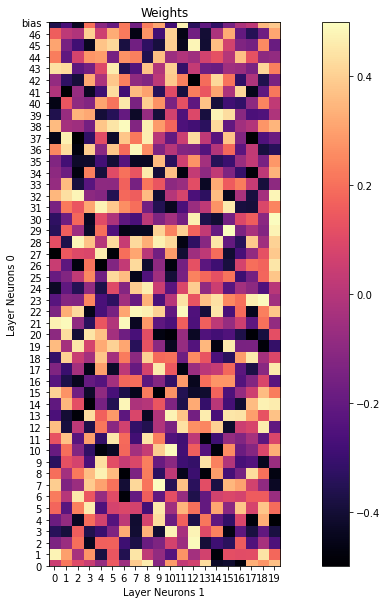

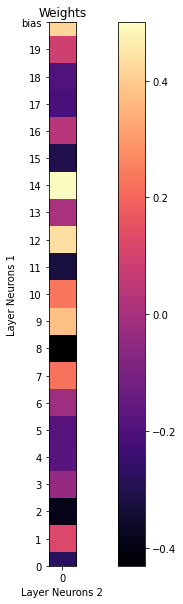

In [19]:
checkerboard(model)

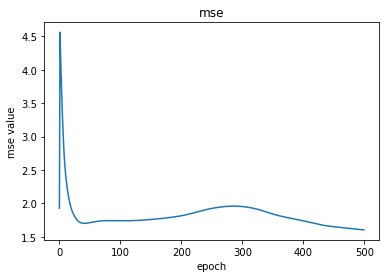

1.6019576668190638


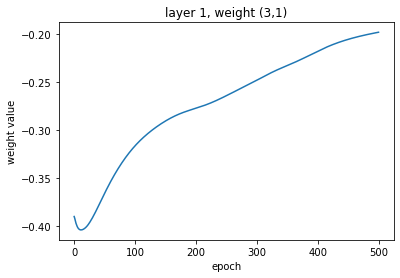

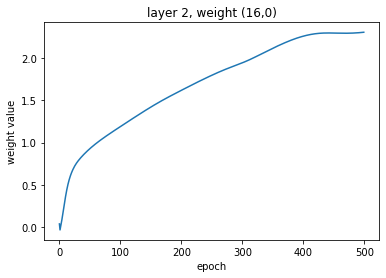

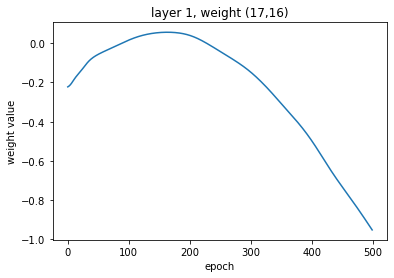

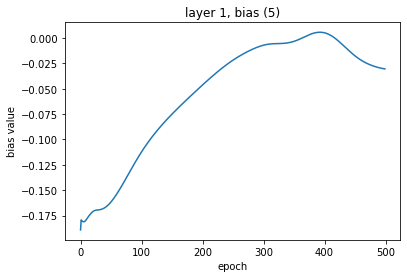

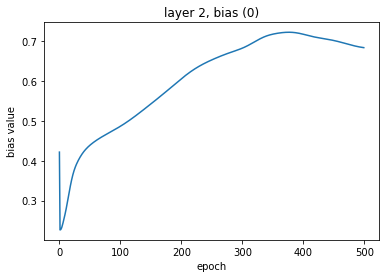


number of epochs to reach an mse of  499
Last MSE: 1.6019576668190638


In [20]:
fit(model, epochs=500,alpha=0.01, dataset=pins, targets=pouts, exit = 0.5, hidden_l=20, output_l=1)

In [21]:
def accuracy(models, pins,pout):
    correct = 0
    for i in range(len(pins)):
        pred = models.threshold_predict(pins[i], thresh=0)

        if pred == pouts[i]:
            correct += 1

    print(f'Accuracy: {correct / (len(pins))}')

In [22]:
accuracy(model,pins,pouts)

Accuracy: 0.9105145413870246


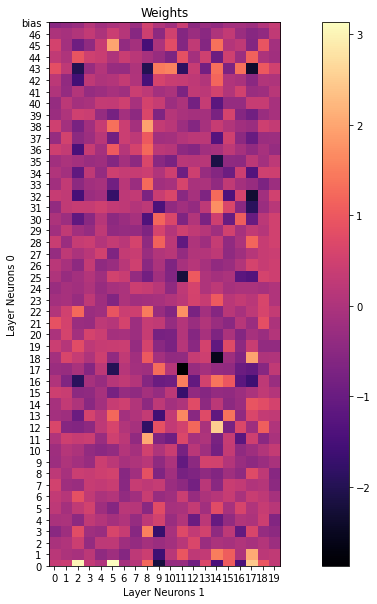

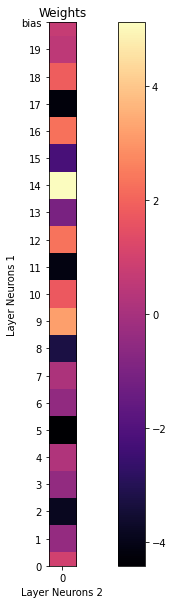

In [23]:
checkerboard(model)

## Nguyen-Widrow Initialization

In [24]:

def NW_init(weights):
    b = 0.7 * (weights[0].shape[1] ** (1./weights[0].shape[0]))
    temp = weights[0].T
    for i in range(len(temp)):
        norm = np.linalg.norm(temp[i])
        new_weights = (temp[i] / norm)
        temp[i] = new_weights
    
    new_bias = np.random.uniform(-b,b,(copy_model.bias[0].shape[0]))
        
    return temp.T, new_bias
        

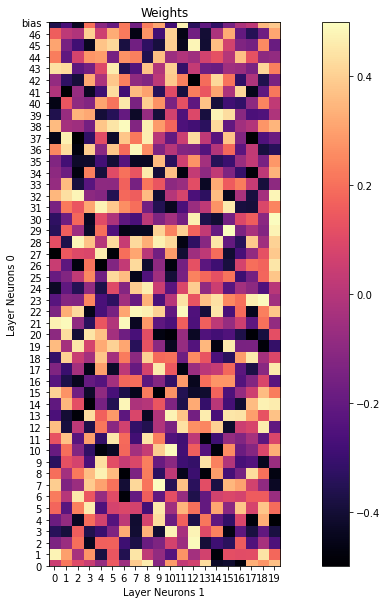

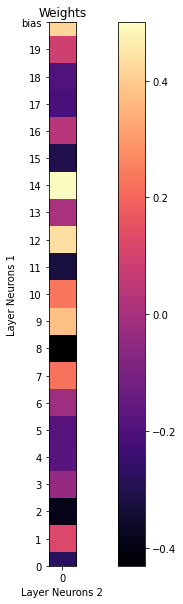

In [25]:
checkerboard(copy_model)

In [26]:
copy_model.NW_init()

0.7460699179362577


In [27]:
copy_model2 = copy.deepcopy(copy_model)

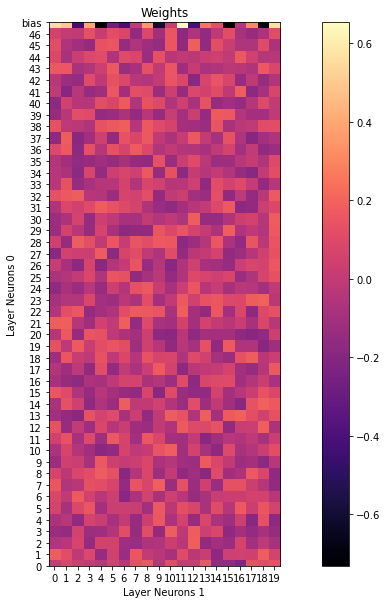

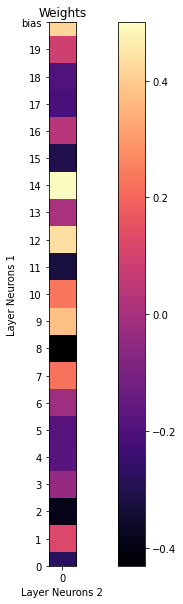

In [28]:
checkerboard(copy_model)

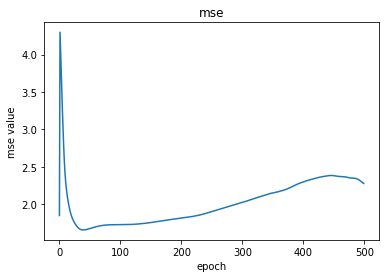

2.2777165778252435


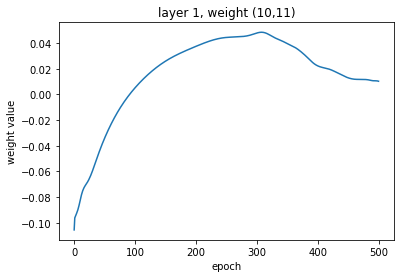

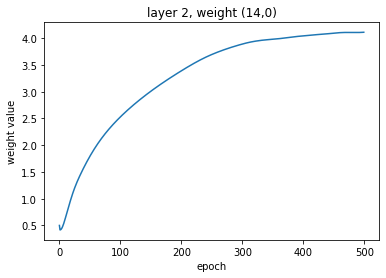

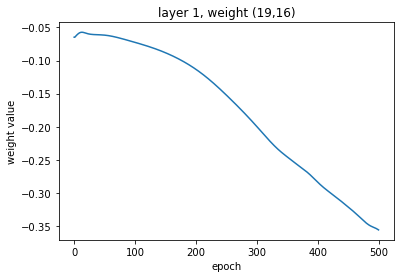

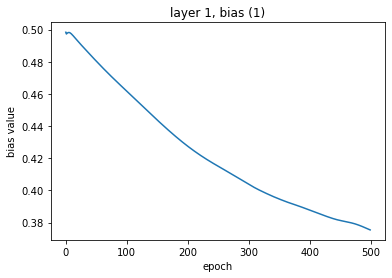

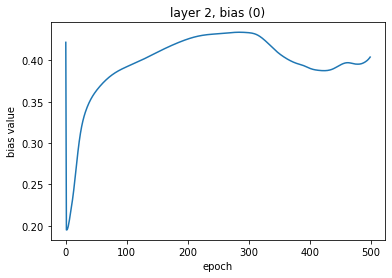


number of epochs to reach an mse of  499
Last MSE: 2.2777165778252435


In [29]:
fit(copy_model, epochs=500,alpha=0.01, dataset=pins, targets=pouts, exit = 0.5, hidden_l=20, output_l=1)

In [30]:
accuracy(copy_model,pins,pouts)

Accuracy: 0.8948545861297539


## Backpropagation With Momentum

In [31]:
def fit_momentum(model,epochs, alpha, momentum, dataset, targets, exit=0.01, input_l=20, hidden_l=10, output_l=5):
    total_mse = []
    random_w1 = []
    random_w2 = []
    random_w3 = []
    bias1 = []
    bias2 = []
    random1 = np.random.randint(input_l)
    random2 = np.random.randint(hidden_l)
    random3 = np.random.randint(hidden_l)
    random4 = np.random.randint(output_l)
    random5 = np.random.randint(input_l)
    random6 = np.random.randint(hidden_l)
    bias_random1 = np.random.randint(hidden_l)
    bias_random2 = np.random.randint(output_l)
    for epoch in range(epochs):
        mse = 0
        random_w1.append(model.weights[0][random1][random2])
        random_w2.append(model.weights[1][random3][random4])
        random_w3.append(model.weights[0][random5][random6])
        bias1.append(model.bias[0][bias_random1])
        bias2.append(model.bias[1][bias_random2])

        for i in range(len(dataset)):
            data = dataset[i]
            target = targets[i]
            mse += model.train_momentum(data, target, alpha, momentum)

        mse = (mse / 25.)
        total_mse.append(mse)
        if mse < exit:
            break
    
    plt.plot(total_mse)
    plt.xlabel('epoch')
    plt.ylabel('mse value')
    plt.title('mse')
    plt.show()
    
    print(total_mse[-1])
    
    plt.plot(random_w1)
    plt.xlabel('epoch')
    plt.ylabel('weight value')
    plt.title('layer 1, weight (' + str(random1) + ',' + str(random2) + ')')
    plt.show()
    
    plt.plot(random_w2)
    plt.xlabel('epoch')
    plt.ylabel('weight value')
    plt.title('layer 2, weight (' + str(random3) + ',' + str(random4) + ')')
    plt.show()
    
    plt.plot(random_w3)
    plt.xlabel('epoch')
    plt.ylabel('weight value')
    plt.title('layer 1, weight (' + str(random5) + ',' + str(random6) + ')')
    plt.show()
    
    plt.plot(bias1)
    plt.xlabel('epoch')
    plt.ylabel('bias value')
    plt.title('layer 1, bias (' + str(bias_random1) + ')')
    plt.show()
    
    plt.plot(bias2)
    plt.xlabel('epoch')
    plt.ylabel('bias value')
    plt.title('layer 2, bias (' + str(bias_random2) + ')')
    plt.show()
    
    
    print('\nnumber of epochs to reach an mse of ' , epoch)
    print(f'Last MSE: {total_mse[-1]}')
    

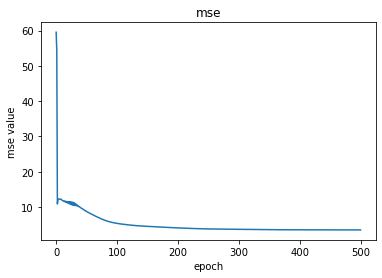

3.5409165014516764


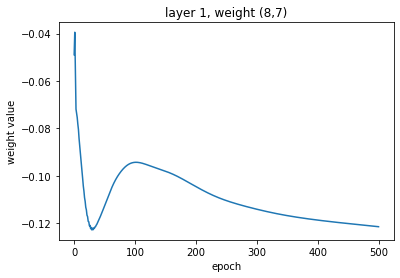

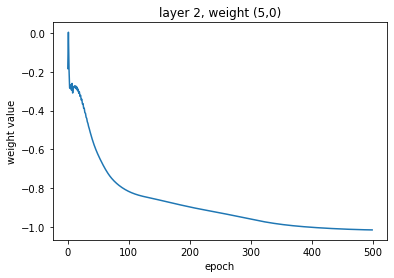

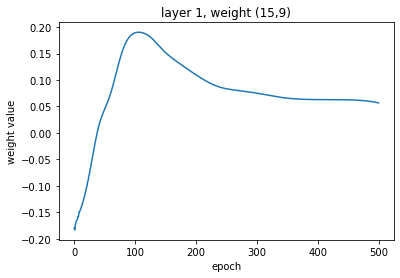

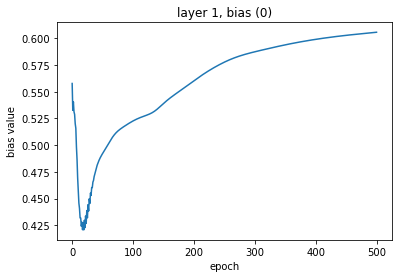

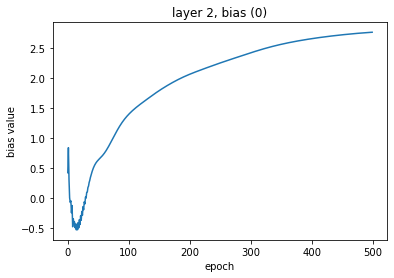


number of epochs to reach an mse of  499
Last MSE: 3.5409165014516764


In [32]:
fit_momentum(copy_model2, epochs=500, alpha=0.01, momentum=0.99, dataset=pins, targets=pouts, exit = 0.5, hidden_l=20, output_l=1)

In [33]:
accuracy(copy_model2,pins,pouts)

Accuracy: 0.9507829977628636


# Conclusion

From this experiment I have notice the advantages of both the Ngyugen-Widrow Initialization and the backpro pagation momentum. Through comparing the bas neural network training I was able to see that the Ngyugen-Widrow Initialization does help training in the beginning, when taking a closer look at the MSE graph, you can see that without the Ngyugen-Widrow method has a lower MSE when it is applies, but in the end it did not perform better at the end. So it goes to show that it might help initially but not in long epochs, but this can probably be explore more with different hyper parameters change.

For back propagation momentum I can see that the MSE shot super high compare to the original backprogation. But then it show back down and stabilize rapidly. So from the looks of it the momentum back propagation approach would be my first go to approach to train a model in small epochs.


# Appendix

## Libraries

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
#from mlxtend.plotting import checkerboard_plot
import matplotlib.cm as cm
%matplotlib inline
np.random.seed(0)

## Helper Functions

**Display model weights as a checker board**

In [35]:
def checkerboard(model):
    for j in range(len(model.weights)):
        x = model.weights[j]
        x = np.append(x, [model.bias[j]], axis=0)
        fig, ax = plt.subplots(figsize=(20,15))
        ax.set_ylim(bottom=0)
        i = ax.imshow(x, cmap=cm.magma, interpolation='nearest')
        plt.xticks(np.arange(x.shape[1]))
        plt.yticks(ticks=np.arange(x.shape[0]), labels=np.append(np.arange(x.shape[0]-1), 'bias'))
        plt.yticks()
        plt.xlabel(f'Layer Neurons {str(j+1)}')
        plt.ylabel(f'Layer Neurons {str(j)}')
        plt.title(f'Weights')
        fig.colorbar(i)

**Display accuracy**

In [36]:
def accuracy(models, pins,pout):
    correct = 0
    for i in range(len(pins)):
        pred = models.threshold_predict(pins[i], thresh=0)

        if pred == pouts[i]:
            correct += 1

    print(f'Accuracy: {correct / (len(pins))}')

## Model code

In [37]:
class Neural_Network:

    def __init__(self):
        self.weights = [] # weight matrices
        self.bias = [] # bias matrices
        self.activation = [] # activation functions
        self.z_val = [np.zeros(1)] # sum values of neurons. note: first value suppose to be inputs
        self.a_val = [np.zeros(1)] # values after activation functions are apply. note: first value suppose to be inputs
        self.sensitivity = [] # sensitivity or delta (derivatives)
        self.prev_delta_w = []
        self.prev_delta_b = []


    def add_layer(self, neurons: int, activation: str, input_shape=None):
        if input_shape is None:
            try:
                w = np.random.uniform(-0.5,0.5,(self.weights[-1].shape[1],neurons))
                self.weights.append(w)
            except IndexError:
                w = np.random.uniform(-0.5,0.5,(1,neurons))
                self.weights.append(w)

        else:
            inputs = np.prod(input_shape)
            w = np.random.uniform(-0.5,0.5,(inputs,neurons))
            self.weights.append(w)
        
        self.prev_delta_w.append(0)
        self.prev_delta_b.append(0)
        self.prev_bias.append(np.zeros(neurons))
        self.activation.append(self.activation_f(activation))
        self.z_val.append(np.zeros(neurons))
        self.a_val.append(np.zeros(neurons))
     
    def NW_init(self):
        beta = 0.7 * (self.weights[0].shape[1] ** (1./self.weights[0].shape[0])) # Calculating Beta
        temp = self.weights[0].T # transposing to get all weights for each neurons in hidden layer
        for i in range(len(temp)):
            norm = np.linalg.norm(temp[i]) # absolute value of weights abs(vj(old))
            new_weights = (temp[i] / norm) * beta 
            temp[i] = new_weights

        new_bias = np.random.uniform(-beta,beta,(copy_model.bias[0].shape[0]))
        
        self.weights[0] = temp.T
        self.bias[0] = new_bias
        
        print(beta)
        
        

    @staticmethod
    def sigmoid(x, derivative: bool=False):
        z = 1/(1+np.exp(-x))
        if derivative:
            z = z * (1-z)
        return z

    @staticmethod
    def tanh(x, derivative: bool=False):
        z =  (1-np.exp(-2*x)) / (1+np.exp(-2*x))
        if derivative:
            z = (1 + z) * (1 - z)
        return z

    @staticmethod
    def linear(x, derivative: bool=False):
        if derivative:
            return np.array(1)
        return x
    
    @staticmethod
    def relu(x, derivative: bool=False):
        z = x * (x>=0)
        if derivative:
            z = 1. * (z>=0) 
            
        return z

    def activation_f(self, activation_name: str):

        activation = {
            'linear' : self.linear,
            'sigmoid' : self.sigmoid,
            'tanh' : self.tanh,
            'relu' : self.relu
        }

        act = str.lower(activation_name)

        if act in activation:
            return activation[act]
        else:
            print("activation function not in record")

    @staticmethod
    def mse(error):

        mse = np.sum(error ** 2)
        return mse

    @staticmethod
    def error(target, output):
        error = (target - output)
        return error
    
    @staticmethod
    def hardlim(output, tresh=0.32):
        
        output[output>tresh] = 1
        output[output<tresh] = -1
        return output
    
    @staticmethod
    def max_arg(output):
        
        index = output.argmax()
        output.fill(-1)
        output[index] = 1
        return output
        
    def feedforward(self, x):
        
        self.a_val[0] = x
        self.z_val[0] = x

        for layer in range(len(self.weights)):

            z = np.dot(self.a_val[layer], self.weights[layer]) + self.bias[layer]
            a = self.activation[layer](z)
            self.z_val[layer+1] = z
            self.a_val[layer+1] = a

    def back_propagate(self, error):
        error = -2 * error # -2 * (target-output)
        self.sensitivity = []
        for i in reversed(range(len(self.weights))):

            s = error * self.activation[i](self.z_val[i+1], derivative=True) # -2 * FMnM * (t-a)
            self.sensitivity.insert(0,s)
            error = np.dot(s, self.weights[i].T)

    def update_weights(self, alpha=0.1):
        for i in range(len(self.weights)):
            sensitivity = self.sensitivity[i]
            a = self.a_val[i]

            sensitivity = sensitivity.reshape(sensitivity.shape[0],-1)
            a = a.reshape(a.shape[0],-1)

            sa = np.dot(sensitivity,a.T)
            
            self.weights[i] = self.weights[i] - (alpha * sa.T) 
            self.bias[i] = self.bias[i] - (alpha * self.sensitivity[i])
            
    def momentum(self, alpha=0.01, momentum=0.8):
        for i in range(len(self.weights)):
            sensitivity = self.sensitivity[i]
            a = self.a_val[i]

            sensitivity = sensitivity.reshape(sensitivity.shape[0],-1)
            a = a.reshape(a.shape[0],-1)

            sa = np.dot(sensitivity,a.T)
            
            current_weights = self.weights[i]
            current_bias = self.bias[i]
            
            delta_w = (momentum * self.prev_delta_w[i]) - (1-momentum)*(alpha * sa.T)
            delta_b = (momentum * self.prev_delta_b[i]) - (1-momentum)*(alpha * self.sensitivity[i]) 
            
            self.weights[i] = self.weights[i] + delta_w
            self.bias[i] = self.bias[i] + delta_b 
            
            self.prev_delta_w[i] = delta_w
            self.prev_delta_b[i] = delta_b
        

    def train(self, x, y, alpha=0.01):

        self.feedforward(x)
        error = self.error(y, self.a_val[-1])
        self.back_propagate(error)
        self.update_weights(alpha)
        return self.mse(error)
    
    def train_momentum(self, x, y, alpha=0.01,momentum=0.9):

        self.feedforward(x)
        error = self.error(y, self.a_val[-1])
        self.back_propagate(error)
        self.momentum(alpha, momentum)
        return self.mse(error)

    def threshold_predict(self,x,thresh=0.32):
        self.a_val[0] = x
        self.z_val[0] = x
        for layer in range(len(self.weights)):

            z = np.dot(self.a_val[layer], self.weights[layer]) + self.bias[layer]
            a = self.activation[layer](z)
            self.z_val[layer+1] = z
            self.a_val[layer+1] = a
        
        return self.hardlim(a, thresh)
    
    def max_arg_predict(self,x):
        self.a_val[0] = x
        self.z_val[0] = x
        for layer in range(len(self.weights)):

            z = np.dot(self.a_val[layer], self.weights[layer]) + self.bias[layer]
            a = self.activation[layer](z)
            self.z_val[layer+1] = z
            self.a_val[layer+1] = a
        
        return self.max_arg(a)
    
    def predict(self,x):
        self.a_val[0] = x
        self.z_val[0] = x
        for layer in range(len(self.weights)):

            z = np.dot(self.a_val[layer], self.weights[layer]) + self.bias[layer]
            a = self.activation[layer](z)
            self.z_val[layer+1] = z
            self.a_val[layer+1] = a
        
        return a

## Basic back propagation train code

In [38]:
def fit(model,epochs, alpha, dataset, targets, exit=0.01, input_l=20, hidden_l=10, output_l=5):
    total_mse = []
    random_w1 = []
    random_w2 = []
    random_w3 = []
    bias1 = []
    bias2 = []
    random1 = np.random.randint(input_l)
    random2 = np.random.randint(hidden_l)
    random3 = np.random.randint(hidden_l)
    random4 = np.random.randint(output_l)
    random5 = np.random.randint(input_l)
    random6 = np.random.randint(hidden_l)
    bias_random1 = np.random.randint(hidden_l)
    bias_random2 = np.random.randint(output_l)
    for epoch in range(epochs):
        mse = 0
        random_w1.append(model.weights[0][random1][random2])
        random_w2.append(model.weights[1][random3][random4])
        random_w3.append(model.weights[0][random5][random6])
        bias1.append(model.bias[0][bias_random1])
        bias2.append(model.bias[1][bias_random2])

        for i in range(len(dataset)):
            data = dataset[i]
            target = targets[i]
            mse += model.train(data, target, alpha)

        mse = (mse / 25.)
        total_mse.append(mse)
        if mse < exit:
            break
    
    plt.plot(total_mse)
    plt.xlabel('epoch')
    plt.ylabel('mse value')
    plt.title('mse')
    plt.show()
    
    print(total_mse[-1])
    
    plt.plot(random_w1)
    plt.xlabel('epoch')
    plt.ylabel('weight value')
    plt.title('layer 1, weight (' + str(random1) + ',' + str(random2) + ')')
    plt.show()
    
    plt.plot(random_w2)
    plt.xlabel('epoch')
    plt.ylabel('weight value')
    plt.title('layer 2, weight (' + str(random3) + ',' + str(random4) + ')')
    plt.show()
    
    plt.plot(random_w3)
    plt.xlabel('epoch')
    plt.ylabel('weight value')
    plt.title('layer 1, weight (' + str(random5) + ',' + str(random6) + ')')
    plt.show()
    
    plt.plot(bias1)
    plt.xlabel('epoch')
    plt.ylabel('bias value')
    plt.title('layer 1, bias (' + str(bias_random1) + ')')
    plt.show()
    
    plt.plot(bias2)
    plt.xlabel('epoch')
    plt.ylabel('bias value')
    plt.title('layer 2, bias (' + str(bias_random2) + ')')
    plt.show()
    
    
    print('\nnumber of epochs to reach an mse of ' , epoch)
    print(f'Last MSE: {total_mse[-1]}')

In [39]:
# model = Neural_Network()
# model.add_layer(neurons=20,activation='sigmoid', input_shape=47)
# model.add_layer(neurons=1, activation='tanh')
# fit(model, epochs=500,alpha=0.01, dataset=pins, targets=pouts, exit = 0.5, hidden_l=20, output_l=1)

## Ngyugen-Widrow Initialization

Process code not in model

In [40]:
def NW_init(weights):
    b = 0.7 * (weights[0].shape[1] ** (1./weights[0].shape[0]))
    temp = weights[0].T
    for i in range(len(temp)):
        norm = np.linalg.norm(temp[i])
        new_weights = (temp[i] / norm)
        temp[i] = new_weights
    
    new_bias = np.random.uniform(-b,b,(copy_model.bias[0].shape[0]))
        
    return temp.T, new_bias

Implemented into the model

In [41]:
#model.NW_init()

## Backpropagation with Momentum Code

In [42]:
def fit_momentum(model,epochs, alpha, momentum, dataset, targets, exit=0.01, input_l=20, hidden_l=10, output_l=5):
    total_mse = []
    random_w1 = []
    random_w2 = []
    random_w3 = []
    bias1 = []
    bias2 = []
    random1 = np.random.randint(input_l)
    random2 = np.random.randint(hidden_l)
    random3 = np.random.randint(hidden_l)
    random4 = np.random.randint(output_l)
    random5 = np.random.randint(input_l)
    random6 = np.random.randint(hidden_l)
    bias_random1 = np.random.randint(hidden_l)
    bias_random2 = np.random.randint(output_l)
    for epoch in range(epochs):
        mse = 0
        random_w1.append(model.weights[0][random1][random2])
        random_w2.append(model.weights[1][random3][random4])
        random_w3.append(model.weights[0][random5][random6])
        bias1.append(model.bias[0][bias_random1])
        bias2.append(model.bias[1][bias_random2])

        for i in range(len(dataset)):
            data = dataset[i]
            target = targets[i]
            mse += model.train_momentum(data, target, alpha, momentum)

        mse = (mse / 25.)
        total_mse.append(mse)
        if mse < exit:
            break
    
    plt.plot(total_mse)
    plt.xlabel('epoch')
    plt.ylabel('mse value')
    plt.title('mse')
    plt.show()
    
    print(total_mse[-1])
    
    plt.plot(random_w1)
    plt.xlabel('epoch')
    plt.ylabel('weight value')
    plt.title('layer 1, weight (' + str(random1) + ',' + str(random2) + ')')
    plt.show()
    
    plt.plot(random_w2)
    plt.xlabel('epoch')
    plt.ylabel('weight value')
    plt.title('layer 2, weight (' + str(random3) + ',' + str(random4) + ')')
    plt.show()
    
    plt.plot(random_w3)
    plt.xlabel('epoch')
    plt.ylabel('weight value')
    plt.title('layer 1, weight (' + str(random5) + ',' + str(random6) + ')')
    plt.show()
    
    plt.plot(bias1)
    plt.xlabel('epoch')
    plt.ylabel('bias value')
    plt.title('layer 1, bias (' + str(bias_random1) + ')')
    plt.show()
    
    plt.plot(bias2)
    plt.xlabel('epoch')
    plt.ylabel('bias value')
    plt.title('layer 2, bias (' + str(bias_random2) + ')')
    plt.show()
    
    
    print('\nnumber of epochs to reach an mse of ' , epoch)
    print(f'Last MSE: {total_mse[-1]}')

In [43]:
# model = Neural_Network()
# model.add_layer(neurons=20,activation='sigmoid', input_shape=47)
# model.add_layer(neurons=1, activation='tanh')
# fit_momentum(model, epochs=500,alpha=0.01, dataset=pins, targets=pouts, exit = 0.5, hidden_l=20, output_l=1)